In [1]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
    train_loss[key] = []

In [4]:
def train():
    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for key in optimizers.keys():
            grads = networks[key].gradient(x_batch, t_batch)
            optimizers[key].update(networks[key].params, grads)

            loss = networks[key].loss(x_batch, t_batch)
            train_loss[key].append(loss)

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")
            for key in optimizers.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + ": " + str(loss))

In [5]:
def plot_gragh():
    markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
    x = np.arange(max_iterations)
    for key in optimizers.keys():
        plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

In [6]:
train()

===========iteration:0===========
SGD: 2.336346437765453
Momentum: 2.357309352742348
AdaGrad: 1.9869503821910297
Adam: 2.1602373766553082
===========iteration:100===========
SGD: 1.4980112295108696
Momentum: 0.4421221256761671
AdaGrad: 0.1963302883307126
Adam: 0.3690882968630577
===========iteration:200===========
SGD: 0.764777432240402
Momentum: 0.2558145367200664
AdaGrad: 0.14701410042022509
Adam: 0.17793696265917233
===========iteration:300===========
SGD: 0.48698839099313246
Momentum: 0.1539581717242306
AdaGrad: 0.08234347126711716
Adam: 0.09882989335643973
===========iteration:400===========
SGD: 0.45928735182158864
Momentum: 0.16945678506534614
AdaGrad: 0.07512963818737908
Adam: 0.11800899898149592
===========iteration:500===========
SGD: 0.3017925136635726
Momentum: 0.1029273528731823
AdaGrad: 0.046269103123349226
Adam: 0.09860593931182117
===========iteration:600===========
SGD: 0.2029798301086308
Momentum: 0.07866085052107732
AdaGrad: 0.03311590129897968
Adam: 0.07025768831972

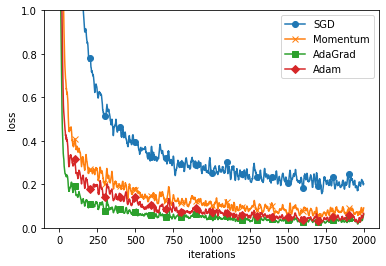

In [7]:
plot_gragh()